In [ ]:
!wget https://raw.githubusercontent.com/Devakumar08/TF_help/main/helper_functions.py



--2024-06-28 14:23:06--  https://raw.githubusercontent.com/Devakumar08/TF_help/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10534 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.29K  --.-KB/s    in 0s      

2024-06-28 14:23:06 (92.1 MB/s) - ‘helper_functions.py’ saved [10534/10534]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [ ]:

unzip_data("/content/Biglycan breast cancer dataset.zip")


In [ ]:
data_path = "/content/Biglycan breast cancer dataset"


In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    label_mode="categorical",
    image_size=IMG_SIZE,
    validation_split=0.3,  # 30% for test
    subset="training",
    seed=123
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    label_mode="categorical",
    image_size=IMG_SIZE,
    validation_split=0.3,  # 30% for test
    subset="validation",
    seed=123
)

Found 336 files belonging to 2 classes.
Using 236 files for training.
Found 336 files belonging to 2 classes.
Using 100 files for validation.


In [ ]:
#learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  #  2 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)

Epoch 1/10
8/8 [==============================] - 7s 233ms/step - loss: 3.0488 - accuracy: 0.4873 - val_loss: 0.7348 - val_accuracy: 0.6500
Epoch 2/10
8/8 [==============================] - 1s 99ms/step - loss: 0.7269 - accuracy: 0.5339 - val_loss: 0.6483 - val_accuracy: 0.6500
Epoch 3/10
8/8 [==============================] - 1s 66ms/step - loss: 0.6852 - accuracy: 0.5847 - val_loss: 0.6407 - val_accuracy: 0.6500
Epoch 4/10
8/8 [==============================] - 1s 66ms/step - loss: 0.6878 - accuracy: 0.5847 - val_loss: 0.6594 - val_accuracy: 0.6500
Epoch 5/10
8/8 [==============================] - 1s 66ms/step - loss: 0.6920 - accuracy: 0.5847 - val_loss: 0.6789 - val_accuracy: 0.6500
Epoch 6/10
8/8 [==============================] - 1s 64ms/step - loss: 0.6827 - accuracy: 0.5551 - val_loss: 0.6489 - val_accuracy: 0.6500
Epoch 7/10
8/8 [==============================] - 1s 66ms/step - loss: 0.6778 - accuracy: 0.5847 - val_loss: 0.6608 - val_accuracy: 0.6500
Epoch 8/10
8/8 [==========

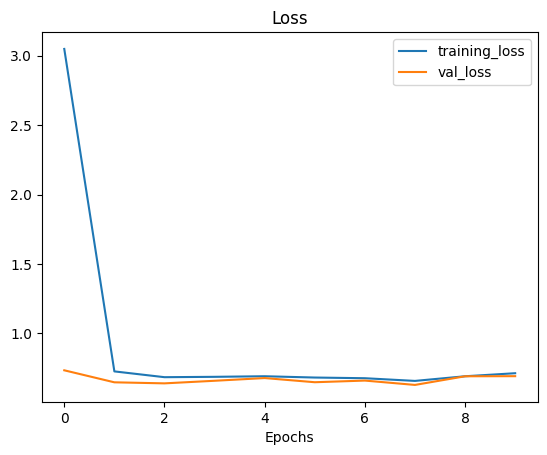

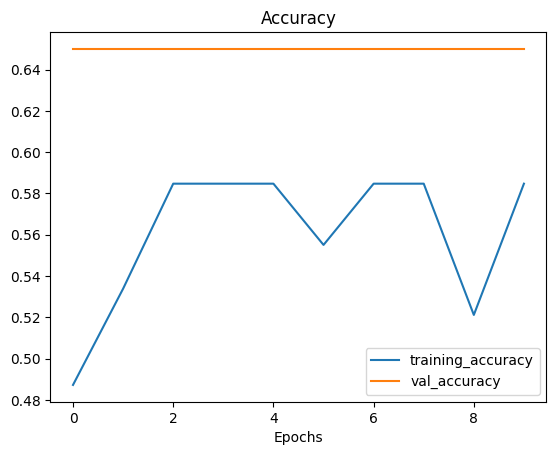

In [ ]:
plot_loss_curves(history)

In [ ]:
from tensorflow.keras.applications import ResNet50


base_model = ResNet50(input_shape=(224, 224, 3),
                      include_top=False,
                      weights='imagenet')


base_model.trainable = False

# Add new layers on top
model_non_trainable = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # Assuming 2 classes
])

# Compile the model
model_non_trainable.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_non_trainable = model_non_trainable.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)

# Evaluate the model
test_loss, test_acc = model_non_trainable.evaluate(test_data, verbose=2)
print(f'\nTest accuracy (non-trainable): {test_acc}')

94765736/94765736 [==============================] - 3s 0us/step
Epoch 1/10
8/8 [==============================] - 10s 548ms/step - loss: 0.8854 - accuracy: 0.5466 - val_loss: 0.5628 - val_accuracy: 0.7300
Epoch 2/10
8/8 [==============================] - 1s 137ms/step - loss: 0.4971 - accuracy: 0.7712 - val_loss: 0.5266 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 1s 139ms/step - loss: 0.3895 - accuracy: 0.8305 - val_loss: 0.4662 - val_accuracy: 0.7800
Epoch 4/10
8/8 [==============================] - 1s 135ms/step - loss: 0.3434 - accuracy: 0.8644 - val_loss: 0.4441 - val_accuracy: 0.7600
Epoch 5/10
8/8 [==============================] - 1s 139ms/step - loss: 0.3269 - accuracy: 0.8475 - val_loss: 0.4193 - val_accuracy: 0.8600
Epoch 6/10
8/8 [==============================] - 1s 140ms/step - loss: 0.2673 - accuracy: 0.8941 - val_loss: 0.4547 - val_accuracy: 0.8100
Epoch 7/10
8/8 [==============================] - 1s 150ms/step - loss: 0.2613 - accuracy: 0.8

In [ ]:

base_model_trainable_50v2 = ResNet50(input_shape=(224, 224, 3),
                                include_top=False,
                                weights='imagenet')


base_model_trainable_50v2.trainable = True


model_trainable2 = models.Sequential([
    base_model_trainable_50v2,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='sigmoid')  # Assuming 2 classes
])

# Compile the model
model_trainable2.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model
history_trainable = model_trainable2.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)

# Evaluate the model
test_loss, test_acc = model_trainable2.evaluate(test_data, verbose=2)
print(f'\nTest accuracy (trainable): {test_acc}')

Epoch 1/10
8/8 [==============================] - 33s 474ms/step - loss: 0.7965 - accuracy: 0.7246 - val_loss: 1146.1168 - val_accuracy: 0.6500
Epoch 2/10
8/8 [==============================] - 3s 324ms/step - loss: 0.4261 - accuracy: 0.8305 - val_loss: 5645.2002 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 3s 327ms/step - loss: 0.3424 - accuracy: 0.8220 - val_loss: 22282.4082 - val_accuracy: 0.6500
Epoch 4/10
8/8 [==============================] - 3s 367ms/step - loss: 0.2742 - accuracy: 0.9025 - val_loss: 12116.2090 - val_accuracy: 0.6500
Epoch 5/10
8/8 [==============================] - 3s 327ms/step - loss: 0.2058 - accuracy: 0.8898 - val_loss: 6773.6738 - val_accuracy: 0.6500
Epoch 6/10
8/8 [==============================] - 3s 328ms/step - loss: 0.3192 - accuracy: 0.8432 - val_loss: 828.5511 - val_accuracy: 0.6500
Epoch 7/10
8/8 [==============================] - 3s 372ms/step - loss: 0.3353 - accuracy: 0.9322 - val_loss: 13362.5439 - val_accuracy: 0.6

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
def evaluate_model(model, test_data):
    y_true = []
    y_pred = []

    for images, labels in test_data:
        predictions = model.predict(images)
        y_true.extend(np.argmax(labels, axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return cm, acc, prec, rec, f1


1/1 [==============================] - 1s 927ms/step

Test accuracy (trainable): 0.65
Precision (trainable): 0.4225
Recall (trainable): 0.65
F1 Score (trainable): 0.5121212121212122


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


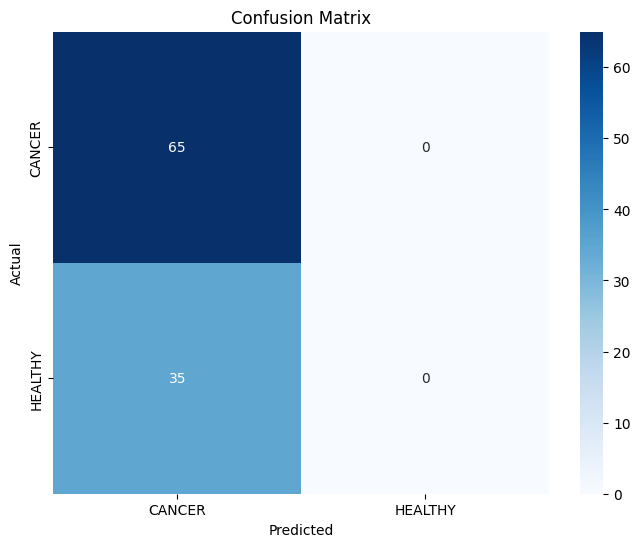

In [ ]:


cm_trainable, acc_trainable, prec_trainable, rec_trainable, f1_trainable = evaluate_model(model_trainable_50v2, test_data)
print(f'\nTest accuracy (trainable): {acc_trainable}')
print(f'Precision (trainable): {prec_trainable}')
print(f'Recall (trainable): {rec_trainable}')
print(f'F1 Score (trainable): {f1_trainable}')
plot_confusion_matrix(cm_trainable, class_names=train_data.class_names)model_trainable_50v2

1/1 [==============================] - 1s 1s/step

Test accuracy (non-trainable): 0.93
Precision (non-trainable): 0.9306423611111111
Recall (non-trainable): 0.93
F1 Score (non-trainable): 0.9302216399170214


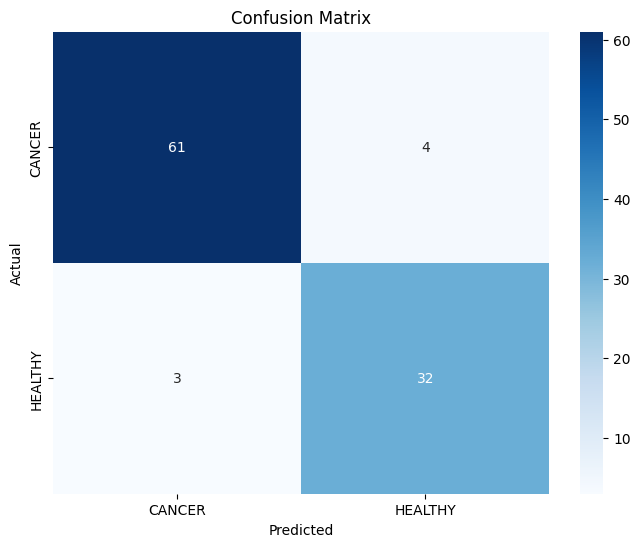

In [ ]:
cm_non_trainable, acc_non_trainable, prec_non_trainable, rec_non_trainable, f1_non_trainable = evaluate_model(model_non_trainable, test_data)
print(f'\nTest accuracy (non-trainable): {acc_non_trainable}')
print(f'Precision (non-trainable): {prec_non_trainable}')
print(f'Recall (non-trainable): {rec_non_trainable}')
print(f'F1 Score (non-trainable): {f1_non_trainable}')
plot_confusion_matrix(cm_non_trainable, class_names=train_data.class_names)


In [ ]:
model_non_trainable.save('/content/model_non_trainable.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pip install keras-resnet


  Preparing metadata (setup.py) ... done
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20456 sha256=f51ea1836dc61db5c6db0caf1a8fbaf05b69d53ad584ee46b10b100b2b66b6c8
  Stored in directory: /root/.cache/pip/wheels/16/af/88/a668b279c5eadbe55dcaf6207f09059135166cefb09088bacc
Successfully built keras-resnet


In [ ]:
!wget https://github.com/broadinstitute/keras-resnet/releases/download/v0.2/resnet-18_imagenet.h5 -O /content/resnet-18_imagenet.h5


--2024-06-22 08:10:03--  https://github.com/broadinstitute/keras-resnet/releases/download/v0.2/resnet-18_imagenet.h5
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-06-22 08:10:03 ERROR 404: Not Found.



In [ ]:

base_model_trainable_50v2 = ResNet50(input_shape=(224, 224, 3),
                                include_top=False,
                                weights='imagenet')


base_model_trainable_50v2.trainable = True


model_trainable2 = models.Sequential([
    base_model_trainable_50v2,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='sigmoid')  # Assuming 2 classes
])

# Compile the model
model_trainable2.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model
history_trainable = model_trainable2.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)

# Evaluate the model
test_loss, test_acc = model_trainable2.evaluate(test_data, verbose=2)
print(f'\nTest accuracy (trainable): {test_acc}')

Epoch 1/10
8/8 [==============================] - 35s 474ms/step - loss: 0.8053 - accuracy: 0.7034 - val_loss: 1930.4840 - val_accuracy: 0.6500
Epoch 2/10
8/8 [==============================] - 3s 366ms/step - loss: 0.5543 - accuracy: 0.8093 - val_loss: 12413.9473 - val_accuracy: 0.6500
Epoch 3/10
8/8 [==============================] - 3s 333ms/step - loss: 0.3863 - accuracy: 0.8220 - val_loss: 46876.0586 - val_accuracy: 0.6500
Epoch 4/10
8/8 [==============================] - 3s 328ms/step - loss: 0.6759 - accuracy: 0.8178 - val_loss: 4954.5928 - val_accuracy: 0.6500
Epoch 5/10
8/8 [==============================] - 3s 331ms/step - loss: 0.4313 - accuracy: 0.7966 - val_loss: 24481.2422 - val_accuracy: 0.6500
Epoch 6/10
8/8 [==============================] - 3s 343ms/step - loss: 0.3415 - accuracy: 0.8136 - val_loss: 88809.5391 - val_accuracy: 0.6500
Epoch 7/10
8/8 [==============================] - 3s 328ms/step - loss: 0.3470 - accuracy: 0.7924 - val_loss: 32978.6758 - val_accuracy: 

#Model with 20 Unfreezed layers Resnet50V2

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models


base_model_trainable_50v2 = ResNet50(input_shape=(224, 224, 3),
                                     include_top=False,
                                     weights='imagenet')


for layer in base_model_trainable_50v2.layers[:-20]:
    layer.trainable = False
for layer in base_model_trainable_50v2.layers[-20:]:
    layer.trainable = True

# Add new layers on top
model_trainable2 = models.Sequential([
    base_model_trainable_50v2,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='sigmoid')  # Assuming 2 classes
])

# Compile the model
model_trainable2.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Train the model
history_trainable = model_trainable2.fit(
    train_data,
    validation_data=test_data,
    epochs=12

# Evaluate the model
test_loss, test_acc = model_trainable2.evaluate(test_data, verbose=2)
print(f'\nTest accuracy (trainable): {test_acc}')


Epoch 1/12
8/8 [==============================] - 9s 372ms/step - loss: 0.6651 - accuracy: 0.7458 - val_loss: 0.7352 - val_accuracy: 0.7700
Epoch 2/12
8/8 [==============================] - 2s 160ms/step - loss: 0.2744 - accuracy: 0.8898 - val_loss: 1.9493 - val_accuracy: 0.8200
Epoch 3/12
8/8 [==============================] - 1s 157ms/step - loss: 0.1999 - accuracy: 0.9449 - val_loss: 5.5031 - val_accuracy: 0.9000
Epoch 4/12
8/8 [==============================] - 2s 194ms/step - loss: 0.0734 - accuracy: 0.9873 - val_loss: 4.8026 - val_accuracy: 0.8900
Epoch 5/12
8/8 [==============================] - 1s 157ms/step - loss: 0.1128 - accuracy: 0.9746 - val_loss: 5.1589 - val_accuracy: 0.8200
Epoch 6/12
8/8 [==============================] - 1s 158ms/step - loss: 0.2090 - accuracy: 0.9280 - val_loss: 10.7198 - val_accuracy: 0.7600
Epoch 7/12
8/8 [==============================] - 1s 157ms/step - loss: 0.1083 - accuracy: 0.9576 - val_loss: 6.8187 - val_accuracy: 0.9000
Epoch 8/12
8/8 [===

1/1 [==============================] - 0s 42ms/step

Test accuracy (trainable): 0.92
Precision (trainable): 0.9348837209302325
Recall (trainable): 0.92
F1 Score (trainable): 0.921479613282892


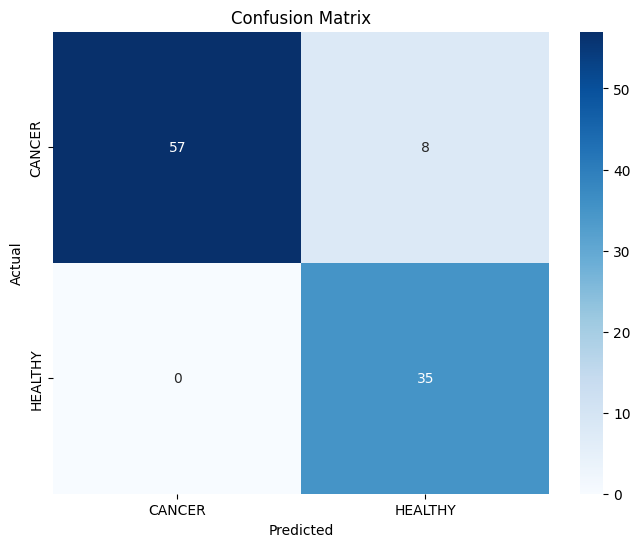

In [ ]:
cm_trainable2, acc_trainable2, prec_trainable2, rec_trainable2, f1_trainable2 = evaluate_model(model_trainable2, test_data)
print(f'\nTest accuracy (trainable): {acc_trainable2}')
print(f'Precision (trainable): {prec_trainable2}')
print(f'Recall (trainable): {rec_trainable2}')
print(f'F1 Score (trainable): {f1_trainable2}')
plot_confusion_matrix(cm_trainable2, class_names=train_data.class_names)


## Info
1.Model with Resnet50V2 with 20 unfreezed layers - 92

2.Model with Resnet50 with nounfreezed layers - 93


In [ ]:

pip install efficientnet


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add new layers on top
model_efficientnet = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # Assuming 2 classes
])

# Compile the model
model_efficientnet.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])



# Train the model
history_efficientnet = model_efficientnet.fit(
    train_data,
    validation_data=test_data,
    epochs=25

# Evaluate the model
test_loss, test_acc = model_efficientnet.evaluate(test_data, verbose=2)
print(f'\nTest accuracy (EfficientNetB0): {test_acc}')


Epoch 1/25
8/8 [==============================] - 10s 312ms/step - loss: 0.6353 - accuracy: 0.6695 - val_loss: 0.5758 - val_accuracy: 0.6600
Epoch 2/25
8/8 [==============================] - 1s 104ms/step - loss: 0.5232 - accuracy: 0.7415 - val_loss: 0.5640 - val_accuracy: 0.7100
Epoch 3/25
8/8 [==============================] - 1s 100ms/step - loss: 0.4886 - accuracy: 0.7203 - val_loss: 0.5379 - val_accuracy: 0.7800
Epoch 4/25
8/8 [==============================] - 1s 101ms/step - loss: 0.4580 - accuracy: 0.7712 - val_loss: 0.4657 - val_accuracy: 0.7700
Epoch 5/25
8/8 [==============================] - 1s 101ms/step - loss: 0.4229 - accuracy: 0.7797 - val_loss: 0.4691 - val_accuracy: 0.7600
Epoch 6/25
8/8 [==============================] - 1s 106ms/step - loss: 0.3956 - accuracy: 0.8305 - val_loss: 0.4643 - val_accuracy: 0.8100
Epoch 7/25
8/8 [==============================] - 1s 156ms/step - loss: 0.3916 - accuracy: 0.8347 - val_loss: 0.4161 - val_accuracy: 0.7900
Epoch 8/25
8/8 [===

#Changing the ratio of test and train data

In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    label_mode="categorical",
    image_size=IMG_SIZE,
    validation_split=0.2,  # 20% for test
    subset="training",
    seed=123
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    label_mode="categorical",
    image_size=IMG_SIZE,
    validation_split=0.2,  # 20% for test
    subset="validation",
    seed=123
)

Found 336 files belonging to 2 classes.
Using 269 files for training.
Found 336 files belonging to 2 classes.
Using 67 files for validation.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add new layers on top
model_efficientnet = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # Assuming 2 classes
])

# Compile the model
model_efficientnet.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])



# Train the model
history_efficientnet = model_efficientnet.fit(
    train_data,
    validation_data=test_data,
    epochs=25
)

# Evaluate the model
test_loss, test_acc = model_efficientnet.evaluate(test_data, verbose=2)
print(f'\nTest accuracy (EfficientNetB0): {test_acc}')


Epoch 1/25
9/9 [==============================] - 10s 394ms/step - loss: 0.6375 - accuracy: 0.5799 - val_loss: 0.5436 - val_accuracy: 0.7313
Epoch 2/25
9/9 [==============================] - 1s 113ms/step - loss: 0.5114 - accuracy: 0.7509 - val_loss: 0.4808 - val_accuracy: 0.7463
Epoch 3/25
9/9 [==============================] - 1s 97ms/step - loss: 0.4771 - accuracy: 0.7807 - val_loss: 0.5074 - val_accuracy: 0.6716
Epoch 4/25
9/9 [==============================] - 1s 86ms/step - loss: 0.4176 - accuracy: 0.7918 - val_loss: 0.4296 - val_accuracy: 0.8507
Epoch 5/25
9/9 [==============================] - 1s 86ms/step - loss: 0.3905 - accuracy: 0.8067 - val_loss: 0.4550 - val_accuracy: 0.7313
Epoch 6/25
9/9 [==============================] - 1s 89ms/step - loss: 0.3648 - accuracy: 0.8364 - val_loss: 0.3793 - val_accuracy: 0.8060
Epoch 7/25
9/9 [==============================] - 1s 87ms/step - loss: 0.3452 - accuracy: 0.8476 - val_loss: 0.3711 - val_accuracy: 0.8060
Epoch 8/25
9/9 [========

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models


base_model_trainable_50v2 = ResNet50(input_shape=(224, 224, 3),
                                     include_top=False,
                                     weights='imagenet')

# Unfreeze the last 20 layers of the base model
for layer in base_model_trainable_50v2.layers[:-20]:
    layer.trainable = False
for layer in base_model_trainable_50v2.layers[-20:]:
    layer.trainable = True

# Add new layers on top
model_trainable2 = models.Sequential([
    base_model_trainable_50v2,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='sigmoid')  # Assuming 2 classes
])

# Compile the model
model_trainable2.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Train the model
history_trainable = model_trainable2.fit(
    train_data,
    validation_data=test_data,
    epochs=12  # Adjust the number of epochs as needed
)

# Evaluate the model
test_loss, test_acc = model_trainable2.evaluate(test_data, verbose=2)
print(f'\nTest accuracy (trainable): {test_acc}')


Epoch 1/12
9/9 [==============================] - 9s 258ms/step - loss: 0.6893 - accuracy: 0.7472 - val_loss: 0.4172 - val_accuracy: 0.7761
Epoch 2/12
9/9 [==============================] - 1s 138ms/step - loss: 0.1942 - accuracy: 0.9368 - val_loss: 0.9063 - val_accuracy: 0.6716
Epoch 3/12
9/9 [==============================] - 1s 139ms/step - loss: 0.0682 - accuracy: 0.9888 - val_loss: 2.4341 - val_accuracy: 0.6567
Epoch 4/12
9/9 [==============================] - 2s 149ms/step - loss: 0.0784 - accuracy: 0.9814 - val_loss: 15.4892 - val_accuracy: 0.4478
Epoch 5/12
9/9 [==============================] - 2s 141ms/step - loss: 0.0943 - accuracy: 0.9591 - val_loss: 9.4101 - val_accuracy: 0.5672
Epoch 6/12
9/9 [==============================] - 1s 139ms/step - loss: 0.1553 - accuracy: 0.9554 - val_loss: 9.7727 - val_accuracy: 0.7164
Epoch 7/12
9/9 [==============================] - 1s 138ms/step - loss: 0.1197 - accuracy: 0.9554 - val_loss: 22.6234 - val_accuracy: 0.5970
Epoch 8/12
9/9 [==

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224, 3),
                      include_top=False,
                      weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Add new layers on top
model_non_trainable2 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(264, activation='relu'),
    layers.Dense(2, activation='softmax')  # Assuming 2 classes
])

# Compile the model
model_non_trainable2.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_non_trainable = model_non_trainable2.fit(
    train_data,
    validation_data=test_data,
    epochs=25 # Adjust the number of epochs as needed
)

# Evaluate the model
test_loss, test_acc = model_non_trainable2.evaluate(test_data, verbose=2)
print(f'\nTest accuracy (non-trainable): {test_acc}')

Epoch 1/25
9/9 [==============================] - 11s 426ms/step - loss: 0.9748 - accuracy: 0.6171 - val_loss: 0.6951 - val_accuracy: 0.7313
Epoch 2/25
9/9 [==============================] - 1s 122ms/step - loss: 0.5391 - accuracy: 0.7584 - val_loss: 0.5205 - val_accuracy: 0.8060
Epoch 3/25
9/9 [==============================] - 1s 121ms/step - loss: 0.4211 - accuracy: 0.7732 - val_loss: 0.6637 - val_accuracy: 0.7015
Epoch 4/25
9/9 [==============================] - 1s 126ms/step - loss: 0.3546 - accuracy: 0.8401 - val_loss: 0.4444 - val_accuracy: 0.8060
Epoch 5/25
9/9 [==============================] - 1s 130ms/step - loss: 0.2894 - accuracy: 0.8550 - val_loss: 0.4144 - val_accuracy: 0.8657
Epoch 6/25
9/9 [==============================] - 1s 119ms/step - loss: 0.2533 - accuracy: 0.9108 - val_loss: 0.4008 - val_accuracy: 0.8657
Epoch 7/25
9/9 [==============================] - 1s 120ms/step - loss: 0.2033 - accuracy: 0.9480 - val_loss: 0.4238 - val_accuracy: 0.8657
Epoch 8/25
9/9 [===

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet121
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add new layers on top
model_densenet = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # Assuming 2 classes
])

# Compile the model
model_densenet.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


# Train the model
history_densenet = model_densenet.fit(
    train_data,
    validation_data=test_data,
    epochs=25  # Adjust epochs as needed
)

# Evaluate the model
test_loss, test_acc = model_densenet.evaluate(test_data, verbose=2)
print(f'\nTest accuracy (DenseNet121): {test_acc}')


Epoch 1/25
9/9 [==============================] - 10s 350ms/step - loss: 2.0700 - accuracy: 0.6171 - val_loss: 1.4990 - val_accuracy: 0.6269
Epoch 2/25
9/9 [==============================] - 1s 122ms/step - loss: 0.8375 - accuracy: 0.6617 - val_loss: 0.4980 - val_accuracy: 0.6866
Epoch 3/25
9/9 [==============================] - 1s 115ms/step - loss: 0.6148 - accuracy: 0.7249 - val_loss: 0.4624 - val_accuracy: 0.7910
Epoch 4/25
9/9 [==============================] - 1s 129ms/step - loss: 0.4464 - accuracy: 0.7918 - val_loss: 0.4950 - val_accuracy: 0.7463
Epoch 5/25
9/9 [==============================] - 1s 116ms/step - loss: 0.3939 - accuracy: 0.7844 - val_loss: 0.6729 - val_accuracy: 0.7313
Epoch 6/25
9/9 [==============================] - 1s 116ms/step - loss: 0.3760 - accuracy: 0.8178 - val_loss: 0.4590 - val_accuracy: 0.7910
Epoch 7/25
9/9 [==============================] - 1s 118ms/step - loss: 0.4575 - accuracy: 0.7955 - val_loss: 0.8519 - val_accuracy: 0.5970
Epoch 8/25
9/9 [===

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet101
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# Load ResNet101 model
base_model = ResNet101(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add new layers on top
model_resnet101 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # Assuming 2 classes
])

# Compile the model
model_resnet101.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


# Train the model
history_resnet101 = model_resnet101.fit(
    train_data,
    validation_data=test_data,
    epochs=25 # Adjust epochs as needed
)

# Evaluate the model
test_loss, test_acc = model_resnet101.evaluate(test_data, verbose=2)
print(f'\nTest accuracy (ResNet101): {test_acc}')


Epoch 1/25
9/9 [==============================] - 10s 509ms/step - loss: 0.8024 - accuracy: 0.5688 - val_loss: 0.5863 - val_accuracy: 0.7015
Epoch 2/25
9/9 [==============================] - 2s 189ms/step - loss: 0.5355 - accuracy: 0.6989 - val_loss: 0.5327 - val_accuracy: 0.7164
Epoch 3/25
9/9 [==============================] - 2s 189ms/step - loss: 0.4452 - accuracy: 0.7881 - val_loss: 0.5414 - val_accuracy: 0.7015
Epoch 4/25
9/9 [==============================] - 2s 191ms/step - loss: 0.4279 - accuracy: 0.7621 - val_loss: 0.4703 - val_accuracy: 0.7463
Epoch 5/25
9/9 [==============================] - 2s 192ms/step - loss: 0.3667 - accuracy: 0.7993 - val_loss: 0.4669 - val_accuracy: 0.7910
Epoch 6/25
9/9 [==============================] - 2s 224ms/step - loss: 0.3446 - accuracy: 0.8513 - val_loss: 0.4410 - val_accuracy: 0.7463
Epoch 7/25
9/9 [==============================] - 2s 190ms/step - loss: 0.3129 - accuracy: 0.8736 - val_loss: 0.4345 - val_accuracy: 0.7910
Epoch 8/25
9/9 [===

#Learning rate scheduler



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


base_model = ResNet101(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Unfreeze all layers
base_model.trainable = True

# Compile the model
model_resnet101 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # Assuming 2 classes
])

# Define learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Compile the model with optimizer, loss, and metrics
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model_resnet101.compile(optimizer=optimizer,
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Summary of the model architecture
model_resnet101.summary()

# Train the model with learning rate scheduler
history_resnet101 = model_resnet101.fit(
    train_data,
    validation_data=test_data,
    epochs=100,
    callbacks=[LearningRateScheduler(lr_scheduler, verbose=1)]
)

# Evaluate the model
test_loss, test_acc = model_resnet101.evaluate(test_data, verbose=2)
print(f'\nTest accuracy (ResNet101): {test_acc}')


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
 3 (GlobalAveragePooling2D)                                      
                                                                 
 dense_48 (Dense)            (None, 128)               262272    
                                                                 
 dense_49 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42920706 (163.73 MB)
Trainable params: 42815362 (163.33 MB)
Non-trainable params: 105344 (411.50 KB)
_________________________________________________________________

Epoch 1: LearningRateScheduler setting learning rate to 0.00100000004

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np



base_model = ResNet101(include_top=False, weights='imagenet', input_shape=(224, 224, 3))


for layer in base_model.layers[:-25]:
    layer.trainable = False

# Compile the model
model_resnet101 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])


def lr_scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Compile the model with optimizer, loss, and metrics
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model_resnet101.compile(optimizer=optimizer,
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


# Train the model with learning rate scheduler
history_resnet101 = model_resnet101.fit(
    train_data,
    validation_data=test_data,
    epochs=100,  # Adjust epochs as needed
    callbacks=[LearningRateScheduler(lr_scheduler, verbose=1)]
)

# Evaluate the model
test_loss, test_acc = model_resnet101.evaluate(test_data, verbose=2)
print(f'\nTest accuracy (ResNet101): {test_acc}')




Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
9/9 [==============================] - 14s 456ms/step - loss: 0.8076 - accuracy: 0.7249 - val_loss: 7.4915 - val_accuracy: 0.4030 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
9/9 [==============================] - 2s 211ms/step - loss: 0.3271 - accuracy: 0.8550 - val_loss: 1.7066 - val_accuracy: 0.7015 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
9/9 [==============================] - 2s 213ms/step - loss: 0.1914 - accuracy: 0.9331 - val_loss: 2.2590 - val_accuracy: 0.8657 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/100
9/9 [==============================] - 2s 213ms/step - loss: 0.1213 - accuracy: 0.9368 - val_loss: 7.5765 - val_accuracy: 0.7463 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.0010

AttributeError: '_PrefetchDataset' object has no attribute 'classes'

#Model with resnet101 with 25 unfreezed layers made with learning rate scheduler

---



1/1 [==============================] - 0s 61ms/step

Test accuracy (trainable): 0.9701492537313433
Precision (trainable): 0.9723604201216142
Recall (trainable): 0.9701492537313433
F1 Score (trainable): 0.970359273053121


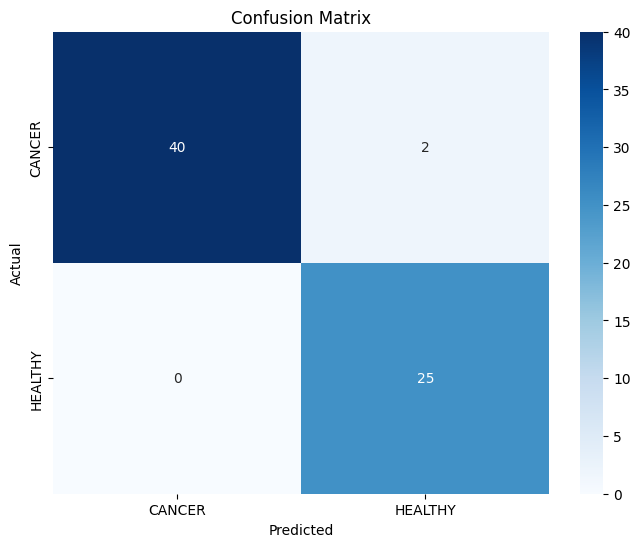

In [ ]:
cm_trainable2_model_resnet101, acc_trainable2_model_resnet101, prec_trainable2_model_resnet101, rec_trainable2_model_resnet101, f1_trainable2_model_resnet101 = evaluate_model(model_resnet101, test_data)
print(f'\nTest accuracy (trainable): {acc_trainable2_model_resnet101}')
print(f'Precision (trainable): {prec_trainable2_model_resnet101}')
print(f'Recall (trainable): {rec_trainable2_model_resnet101}')
print(f'F1 Score (trainable): {f1_trainable2_model_resnet101}')
plot_confusion_matrix(cm_trainable2_model_resnet101, class_names=train_data.class_names)


In [ ]:
model_resnet101.save('/content/model_resnet101.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Changing the ratio back to 0.3


In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    label_mode="categorical",
    image_size=IMG_SIZE,
    validation_split=0.3,  # 30% for test
    subset="training",
    seed=123
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    label_mode="categorical",
    image_size=IMG_SIZE,
    validation_split=0.3,  # 30% for test
    subset="validation",
    seed=123
)

Found 336 files belonging to 2 classes.
Using 236 files for training.
Found 336 files belonging to 2 classes.
Using 100 files for validation.


##Resnet 101 same model with this ratio

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have loaded and preprocessed your data into train_data and test_data

# Load ResNet101 model
base_model = ResNet101(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Unfreeze specific layers
# Count layers and choose how many to unfreeze
for layer in base_model.layers[:-25]:
    layer.trainable = False

# Compile the model
model_resnet101 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # Assuming 2 classes
])

# Define learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Compile the model with optimizer, loss, and metrics
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model_resnet101.compile(optimizer=optimizer,
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


# Train the model with learning rate scheduler
history_resnet101 = model_resnet101.fit(
    train_data,
    validation_data=test_data,
    epochs=100,  # Adjust epochs as needed
    callbacks=[LearningRateScheduler(lr_scheduler, verbose=1)]
)

# Evaluate the model
test_loss, test_acc = model_resnet101.evaluate(test_data, verbose=2)
print(f'\nTest accuracy (ResNet101): {test_acc}')




Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
8/8 [==============================] - 14s 531ms/step - loss: 0.7132 - accuracy: 0.7331 - val_loss: 20.6530 - val_accuracy: 0.5200 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
8/8 [==============================] - 2s 250ms/step - loss: 0.5574 - accuracy: 0.7881 - val_loss: 69.1007 - val_accuracy: 0.4100 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
8/8 [==============================] - 2s 258ms/step - loss: 0.2724 - accuracy: 0.9025 - val_loss: 1.7044 - val_accuracy: 0.7800 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/100
8/8 [==============================] - 2s 240ms/step - loss: 0.1886 - accuracy: 0.9322 - val_loss: 44.1401 - val_accuracy: 0.3500 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.0

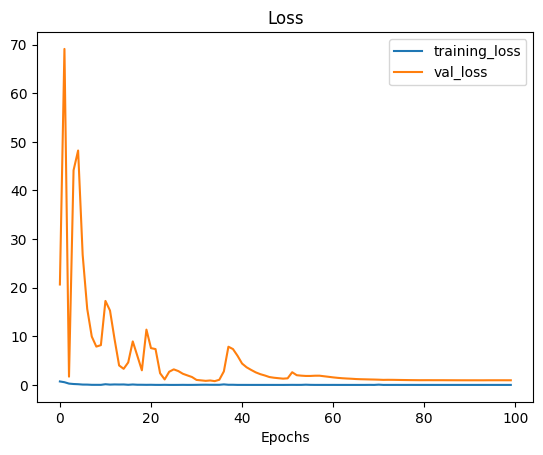

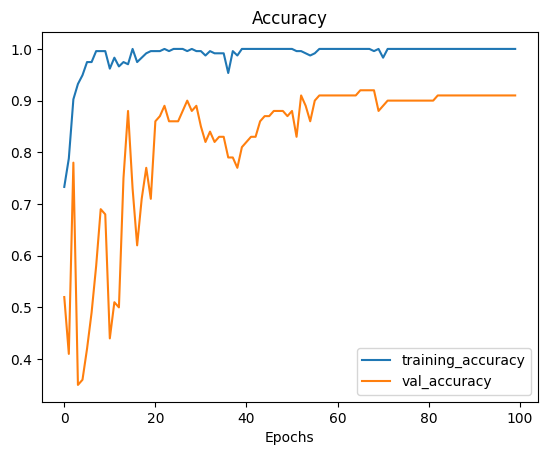

In [ ]:
plot_loss_curves(history_resnet101)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have loaded and preprocessed your data into train_data and test_data

# Define learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Function to create and compile the model
def create_model(num_unfrozen_layers):
    base_model = ResNet101(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

    # Freeze layers incrementally
    for layer in base_model.layers[:-num_unfrozen_layers]:
        layer.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')  # Assuming 2 classes
    ])

    # Compile the model
    initial_learning_rate = 0.001
    optimizer = Adam(learning_rate=initial_learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Function to train and evaluate the model
def train_and_evaluate(num_unfrozen_layers):
    model = create_model(num_unfrozen_layers)
    history = model.fit(
        train_data,
        validation_data=test_data,
        epochs=100,  # Adjust epochs as needed
        callbacks=[LearningRateScheduler(lr_scheduler, verbose=1)]
    )

    test_loss, test_acc = model.evaluate(test_data, verbose=2)
    return test_acc

# Number of layers in the base model
total_layers = len(ResNet101(include_top=False, weights='imagenet').layers)

# Initialize variables to keep track of the best model
best_acc = 0
best_num_unfrozen_layers = 0

# Loop through and progressively unfreeze layers
for num_unfrozen_layers in range(1, total_layers + 1):
    print(f"Training with {num_unfrozen_layers} layers unfrozen...")
    test_acc = train_and_evaluate(num_unfrozen_layers)
    print(f"Test accuracy with {num_unfrozen_layers} layers unfrozen: {test_acc}\n")

    if test_acc > best_acc:
        best_acc = test_acc
        best_num_unfrozen_layers = num_unfrozen_layers

print(f"Best accuracy: {best_acc} with {best_num_unfrozen_layers} layers unfrozen")


171446536/171446536 [==============================] - 1s 0us/step
Training with 1 layers unfrozen...


NameError: name 'train_data' is not defined